In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [147]:
df_churn=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/Logistic Regression/Telecom Churn/churn_data.csv')
df_churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [148]:
df_cust=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/Logistic Regression/Telecom Churn/customer_data.csv')
df_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [149]:
df_internet=pd.read_csv('/Users/apple/Desktop/Data science/UpGrad ML/Logistic Regression/Telecom Churn/internet_data.csv')
df_internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [150]:
df_merged=pd.merge(df_churn,df_cust,on='customerID',how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 13 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 770.3+ KB


In [151]:
df_merged.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Female,0,No,No
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,Male,0,No,Yes
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No,Female,0,No,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Female,0,Yes,No
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No,Male,0,No,Yes


In [152]:
df_merged=pd.merge(df_merged,df_internet,on='customerID',how='inner')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [153]:
df_merged.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [154]:
dummies_PS=pd.get_dummies(df_merged['PhoneService'],prefix='PhoneService_ct',drop_first=True)
dummies_PS.head()

,PhoneService_ct_Yes
0,0
1,1
2,1
3,0
4,1


In [155]:
df_merged=pd.concat([df_merged,dummies_PS],axis='columns')
df_merged=df_merged.drop('PhoneService',axis='columns')
df_merged.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,1
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1


In [156]:
dummies_contract=pd.get_dummies(df_merged['Contract'],prefix='contract',drop_first=True)
dummies_contract.head()

,contract_One year,contract_Two year
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0


In [157]:
df_merged=pd.concat([df_merged,dummies_contract],axis='columns')
df_merged=df_merged.drop('Contract',axis='columns')
df_merged.head()

,customerID,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year
0,7590-VHVEG,1,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,0,0,0
1,5575-GNVDE,34,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,1,1,0
2,3668-QPYBK,2,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1,0,0
3,7795-CFOCW,45,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0
4,9237-HQITU,2,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1,0,0


In [158]:
dummies_PB=pd.get_dummies(df_merged['PaperlessBilling'],drop_first=True,prefix='PaperlessBilling')
dummies_PB.head()

,PaperlessBilling_Yes
0,1
1,0
2,1
3,0
4,1


In [159]:
df_merged=pd.concat([df_merged,dummies_PB],axis=1)
df_merged=df_merged.drop('PaperlessBilling',axis=1)
df_merged.head()

,customerID,tenure,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes
0,7590-VHVEG,1,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1
1,5575-GNVDE,34,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0
2,3668-QPYBK,2,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1,0,0,1
3,7795-CFOCW,45,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,0
4,9237-HQITU,2,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1,0,0,1


In [160]:
dummies_PM=pd.get_dummies(df_merged['PaymentMethod'],drop_first=True)
dummies_PM.head()

,Credit card (automatic),Electronic check,Mailed check
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,1,0


In [161]:
df_merged=pd.concat([df_merged,dummies_PM],axis=1)
df_merged=df_merged.drop('PaymentMethod',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,1,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1,0,0,1,0,1,0


In [162]:
dummies_churn=pd.get_dummies(df_merged['Churn'],drop_first=True,prefix='Churn')
dummies_churn.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [163]:
df_merged=pd.concat([df_merged,dummies_churn],axis=1)
df_merged=df_merged.drop('Churn',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,1,0,0
1,5575-GNVDE,34,56.95,1889.5,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,1,0,0,1,0,0,1,1
3,7795-CFOCW,45,42.30,1840.75,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,1,0,0,1,0,1,0,1


In [164]:
dummies_P=pd.get_dummies(df_merged['Partner'],drop_first=True,prefix='Partner')
dummies_P.head()

,Partner_Yes
0,1
1,0
2,0
3,0
4,0


In [165]:
df_merged=pd.concat([df_merged,dummies_P],axis=1)
df_merged=df_merged.drop('Partner',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes
0,7590-VHVEG,1,29.85,29.85,Female,0,No,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,1,0,0,1
1,5575-GNVDE,34,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,1,0,0,1,0,0,1,1,0
3,7795-CFOCW,45,42.30,1840.75,Male,0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,0,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,1,0,0,1,0,1,0,1,0


In [166]:
dummies_gender=pd.get_dummies(df_merged['gender'],drop_first=True,prefix='Gender')
dummies_gender.head()

,Gender_Male
0,0
1,1
2,1
3,1
4,0


In [167]:
df_merged=pd.concat([df_merged,dummies_gender],axis=1)
df_merged=df_merged.drop('gender',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male
0,7590-VHVEG,1,29.85,29.85,0,No,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,No,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,0,1,0,0,1
2,3668-QPYBK,2,53.85,108.15,0,No,No,DSL,Yes,Yes,No,No,No,No,1,0,0,1,0,0,1,1,0,1
3,7795-CFOCW,45,42.30,1840.75,0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,0,0,0,0,0,0,1
4,9237-HQITU,2,70.70,151.65,0,No,No,Fiber optic,No,No,No,No,No,No,1,0,0,1,0,1,0,1,0,0


In [168]:
dummies_dep=pd.get_dummies(df_merged['Dependents'],drop_first=True,prefix='Dependents')
dummies_dep.head()

,Dependents_Yes
0,0
1,0
2,0
3,0
4,0


In [169]:
df_merged=pd.concat([df_merged,dummies_dep],axis=1)
df_merged=df_merged.drop('Dependents',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes
0,7590-VHVEG,1,29.85,29.85,0,No phone service,DSL,No,Yes,No,No,No,No,0,0,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.5,0,No,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,0,1,0,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,No,DSL,Yes,Yes,No,No,No,No,1,0,0,1,0,0,1,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,0,1,0,0,0,0,0,0,0,1,0
4,9237-HQITU,2,70.70,151.65,0,No,Fiber optic,No,No,No,No,No,No,1,0,0,1,0,1,0,1,0,0,0


In [170]:
dummies_ML=pd.get_dummies(df_merged['MultipleLines'],prefix='MultiLines')
dummies_ML=dummies_ML.drop('MultiLines_No phone service',axis=1)
dummies_ML.head()

,MultiLines_No,MultiLines_Yes
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [171]:
df_merged=pd.concat([df_merged,dummies_ML],axis=1)
df_merged=df_merged.drop('MultipleLines',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes
0,7590-VHVEG,1,29.85,29.85,0,DSL,No,Yes,No,No,No,No,0,0,0,1,0,1,0,0,1,0,0,0,0
1,5575-GNVDE,34,56.95,1889.5,0,DSL,Yes,No,Yes,No,No,No,1,1,0,0,0,0,1,0,0,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,DSL,Yes,Yes,No,No,No,No,1,0,0,1,0,0,1,1,0,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,DSL,Yes,No,Yes,Yes,No,No,0,1,0,0,0,0,0,0,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,0,Fiber optic,No,No,No,No,No,No,1,0,0,1,0,1,0,1,0,0,0,1,0


In [172]:
dummies_IS=pd.get_dummies(df_merged['InternetService'],prefix='Inter')
dummies_IS=dummies_IS.drop('Inter_No',axis=1)
dummies_IS.head()

,Inter_DSL,Inter_Fiber optic
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [173]:
df_merged=pd.concat([df_merged,dummies_IS],axis=1)
df_merged=df_merged.drop('InternetService',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic
0,7590-VHVEG,1,29.85,29.85,0,No,Yes,No,No,No,No,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,Yes,No,Yes,No,No,No,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,Yes,Yes,No,No,No,No,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,Yes,No,Yes,Yes,No,No,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,9237-HQITU,2,70.70,151.65,0,No,No,No,No,No,No,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1


In [174]:
dummies_OS=pd.get_dummies(df_merged['OnlineSecurity'],prefix='OnlineSecurity')
dummies_OS=dummies_OS.drop('OnlineSecurity_No internet service',axis=1)
dummies_OS.head()


,OnlineSecurity_No,OnlineSecurity_Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [175]:
df_merged=pd.concat([df_merged,dummies_OS],axis=1)
df_merged=df_merged.drop('OnlineSecurity',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes
0,7590-VHVEG,1,29.85,29.85,0,Yes,No,No,No,No,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,No,Yes,No,No,No,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1
2,3668-QPYBK,2,53.85,108.15,0,Yes,No,No,No,No,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,No,Yes,Yes,No,No,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,9237-HQITU,2,70.70,151.65,0,No,No,No,No,No,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0


In [176]:
dummies_OB=pd.get_dummies(df_merged['OnlineBackup'],prefix='OnlineBackup')
dummies_OB=dummies_OB.drop('OnlineBackup_No internet service',axis=1)
dummies_OB.head()


,OnlineBackup_No,OnlineBackup_Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [177]:
df_merged=pd.concat([df_merged,dummies_OB],axis=1)
df_merged=df_merged.drop('OnlineBackup',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,1,29.85,29.85,0,No,No,No,No,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1
1,5575-GNVDE,34,56.95,1889.5,0,Yes,No,No,No,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0
2,3668-QPYBK,2,53.85,108.15,0,No,No,No,No,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1
3,7795-CFOCW,45,42.30,1840.75,0,Yes,Yes,No,No,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
4,9237-HQITU,2,70.70,151.65,0,No,No,No,No,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0


In [178]:
dummies_DP=pd.get_dummies(df_merged['DeviceProtection'],prefix='DeviceProtection')
dummies_DP=dummies_DP.drop('DeviceProtection_No internet service',axis=1)
dummies_DP.head()

,DeviceProtection_No,DeviceProtection_Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [179]:
df_merged=pd.concat([df_merged,dummies_DP],axis=1)
df_merged=df_merged.drop('DeviceProtection',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,TechSupport,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,1,29.85,29.85,0,No,No,No,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
1,5575-GNVDE,34,56.95,1889.5,0,No,No,No,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1
2,3668-QPYBK,2,53.85,108.15,0,No,No,No,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0
3,7795-CFOCW,45,42.30,1840.75,0,Yes,No,No,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1
4,9237-HQITU,2,70.70,151.65,0,No,No,No,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0


In [180]:
dummies_TS=pd.get_dummies(df_merged['TechSupport'],prefix='TechSupport')
dummies_TS=dummies_TS.drop('TechSupport_No internet service',axis=1)
dummies_TS.head()

,TechSupport_No,TechSupport_Yes
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [181]:
df_merged=pd.concat([df_merged,dummies_TS],axis=1)
df_merged=df_merged.drop('TechSupport',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,StreamingTV,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,1,29.85,29.85,0,No,No,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,No,No,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,2,53.85,108.15,0,No,No,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,No,No,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1
4,9237-HQITU,2,70.70,151.65,0,No,No,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0


In [182]:
dummies_TV=pd.get_dummies(df_merged['StreamingTV'],prefix='TV')
dummies_TV=dummies_TV.drop('TV_No internet service',axis=1)
dummies_TV.head()

,TV_No,TV_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [183]:
df_merged=pd.concat([df_merged,dummies_TV],axis=1)
df_merged=df_merged.drop('StreamingTV',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,StreamingMovies,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,TV_No,TV_Yes
0,7590-VHVEG,1,29.85,29.85,0,No,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,No,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,No,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,No,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0
4,9237-HQITU,2,70.70,151.65,0,No,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0


In [184]:
dummies_Mo=pd.get_dummies(df_merged['StreamingMovies'],prefix='Movies')
dummies_Mo=dummies_Mo.drop('Movies_No internet service',axis=1)
dummies_Mo.head()

,Movies_No,Movies_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [185]:
df_merged=pd.concat([df_merged,dummies_Mo],axis=1)
df_merged=df_merged.drop('StreamingMovies',axis=1)
df_merged.head()

,customerID,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,TV_No,TV_Yes,Movies_No,Movies_Yes
0,7590-VHVEG,1,29.85,29.85,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,53.85,108.15,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,42.30,1840.75,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,70.70,151.65,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [186]:
df_merged['TotalCharges']=df_merged['TotalCharges'].convert_objects(convert_numeric=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [187]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                 7043 non-null object
tenure                     7043 non-null int64
MonthlyCharges             7043 non-null float64
TotalCharges               7032 non-null float64
SeniorCitizen              7043 non-null int64
PhoneService_ct_Yes        7043 non-null uint8
contract_One year          7043 non-null uint8
contract_Two year          7043 non-null uint8
PaperlessBilling_Yes       7043 non-null uint8
Credit card (automatic)    7043 non-null uint8
Electronic check           7043 non-null uint8
Mailed check               7043 non-null uint8
Churn_Yes                  7043 non-null uint8
Partner_Yes                7043 non-null uint8
Gender_Male                7043 non-null uint8
Dependents_Yes             7043 non-null uint8
MultiLines_No              7043 non-null uint8
MultiLines_Yes             7043 non-null uint8
Inter_DSL                  7043 non-null u

In [188]:
df_merged.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Churn_Yes,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,TV_No,TV_Yes,Movies_No,Movies_Yes
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.162147,0.903166,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370,0.483033,0.504756,0.299588,0.481329,0.421837,0.343746,0.439585,0.496663,0.286668,0.438450,0.344881,0.439443,0.343888,0.493114,0.290217,0.398978,0.384353,0.395428,0.387903
std,24.559481,30.090047,2266.771362,0.368612,0.295752,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561,0.499748,0.500013,0.458110,0.499687,0.493888,0.474991,0.496372,0.500024,0.452237,0.496232,0.475363,0.496355,0.475038,0.499988,0.453895,0.489723,0.486477,0.488977,0.487307
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,401.450000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3794.737500,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
df_merged.isnull().sum()

customerID                  0
tenure                      0
MonthlyCharges              0
TotalCharges               11
SeniorCitizen               0
PhoneService_ct_Yes         0
contract_One year           0
contract_Two year           0
PaperlessBilling_Yes        0
Credit card (automatic)     0
Electronic check            0
Mailed check                0
Churn_Yes                   0
Partner_Yes                 0
Gender_Male                 0
Dependents_Yes              0
MultiLines_No               0
MultiLines_Yes              0
Inter_DSL                   0
Inter_Fiber optic           0
OnlineSecurity_No           0
OnlineSecurity_Yes          0
OnlineBackup_No             0
OnlineBackup_Yes            0
DeviceProtection_No         0
DeviceProtection_Yes        0
TechSupport_No              0
TechSupport_Yes             0
TV_No                       0
TV_Yes                      0
Movies_No                   0
Movies_Yes                  0
dtype: int64

In [190]:
df_merged=df_merged.dropna()

In [191]:
print(df_merged.isnull().sum())

df_merged.info()


customerID                 0
tenure                     0
MonthlyCharges             0
TotalCharges               0
SeniorCitizen              0
PhoneService_ct_Yes        0
contract_One year          0
contract_Two year          0
PaperlessBilling_Yes       0
Credit card (automatic)    0
Electronic check           0
Mailed check               0
Churn_Yes                  0
Partner_Yes                0
Gender_Male                0
Dependents_Yes             0
MultiLines_No              0
MultiLines_Yes             0
Inter_DSL                  0
Inter_Fiber optic          0
OnlineSecurity_No          0
OnlineSecurity_Yes         0
OnlineBackup_No            0
OnlineBackup_Yes           0
DeviceProtection_No        0
DeviceProtection_Yes       0
TechSupport_No             0
TechSupport_Yes            0
TV_No                      0
TV_Yes                     0
Movies_No                  0
Movies_Yes                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entr

In [192]:
x= df_merged.drop(['customerID','Churn_Yes'],axis=1)
y=df_merged['Churn_Yes']

In [327]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [328]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 879 to 5649
Data columns (total 30 columns):
tenure                     4922 non-null int64
MonthlyCharges             4922 non-null float64
TotalCharges               4922 non-null float64
SeniorCitizen              4922 non-null int64
PhoneService_ct_Yes        4922 non-null uint8
contract_One year          4922 non-null uint8
contract_Two year          4922 non-null uint8
PaperlessBilling_Yes       4922 non-null uint8
Credit card (automatic)    4922 non-null uint8
Electronic check           4922 non-null uint8
Mailed check               4922 non-null uint8
Partner_Yes                4922 non-null uint8
Gender_Male                4922 non-null uint8
Dependents_Yes             4922 non-null uint8
MultiLines_No              4922 non-null uint8
MultiLines_Yes             4922 non-null uint8
Inter_DSL                  4922 non-null uint8
Inter_Fiber optic          4922 non-null uint8
OnlineSecurity_No          4922 non-null 

In [329]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 942 to 4987
Data columns (total 30 columns):
tenure                     2110 non-null int64
MonthlyCharges             2110 non-null float64
TotalCharges               2110 non-null float64
SeniorCitizen              2110 non-null int64
PhoneService_ct_Yes        2110 non-null uint8
contract_One year          2110 non-null uint8
contract_Two year          2110 non-null uint8
PaperlessBilling_Yes       2110 non-null uint8
Credit card (automatic)    2110 non-null uint8
Electronic check           2110 non-null uint8
Mailed check               2110 non-null uint8
Partner_Yes                2110 non-null uint8
Gender_Male                2110 non-null uint8
Dependents_Yes             2110 non-null uint8
MultiLines_No              2110 non-null uint8
MultiLines_Yes             2110 non-null uint8
Inter_DSL                  2110 non-null uint8
Inter_Fiber optic          2110 non-null uint8
OnlineSecurity_No          2110 non-null 

In [330]:
scaler=StandardScaler()
x_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [331]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_No,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,TV_No,TV_Yes,Movies_No,Movies_Yes
879,0.019693,-0.338074,-0.276449,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0
5790,0.305384,-0.464443,-0.112702,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,0.581425,-0.974430,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1.505913,-0.550676,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1.106854,-0.835971,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1


In [332]:
# Percentage of data where customer churn happened.
churn= (sum(df_merged['Churn_Yes']))/(len(df_merged['Churn_Yes']))
churn

0.26578498293515357

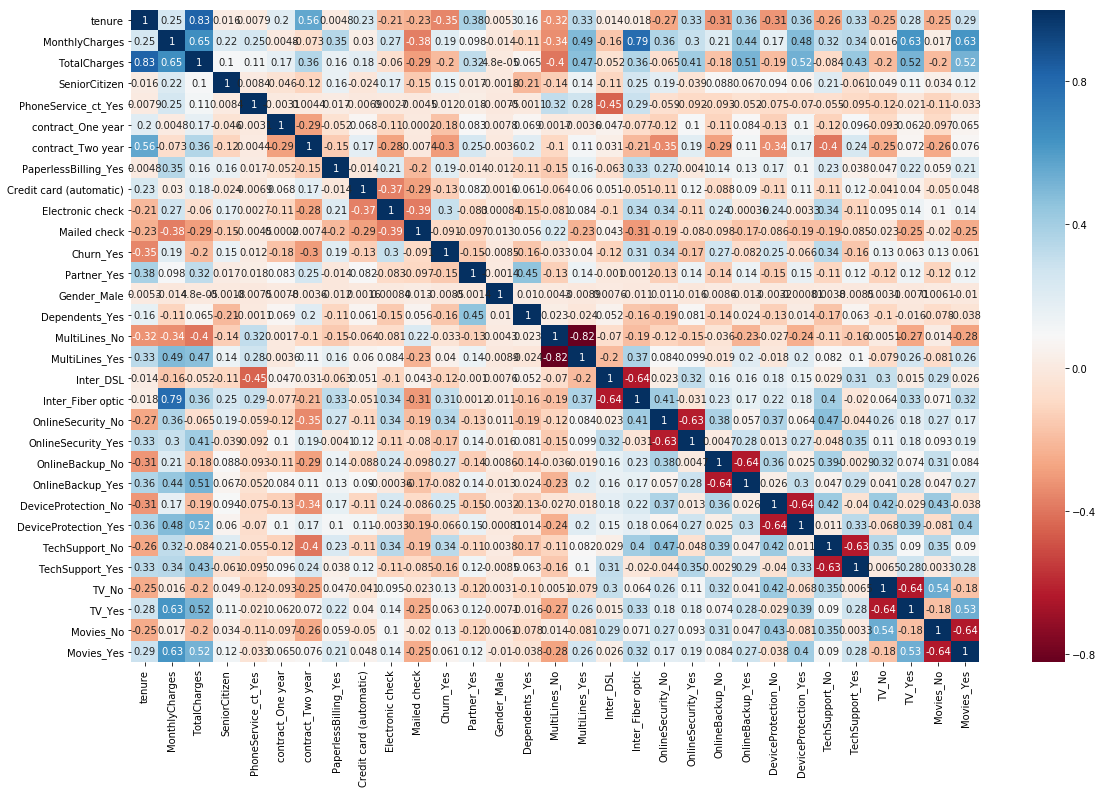

In [333]:
plt.figure(figsize=(19,12))
sns.heatmap(df_merged.corr(),annot=True,cmap='RdBu')

In [334]:
x_train=x_train.drop(['MultiLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',\
                     'TechSupport_No','TV_No','Movies_No'],axis=1)
x_test=x_test.drop(['MultiLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',\
                     'TechSupport_No','TV_No','Movies_No'],axis=1)

In [335]:
x_train_sm=sm.add_constant(x_train)

In [336]:
model=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Mon, 29 Jul 2019   Deviance:                       4009.4
Time:                        11:50:47   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -6.7174      2.512     -2.674      0.007     -11.640      -1.794
tenure                     -1.5172      0.189     -8.015      0.000      -1.888      -1.146
MonthlyCharges             -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen               0.3984      0.102      3.924      0.000       0.199       0.597
PhoneService_ct_Yes         0.9507      0.789      1.205      0.228      -0.595       2.497
contract_One year          -0.6578      0.129     -5.106      0.000      -0.910      -0.405
contract_Two year          -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaperlessBilling_Yes        0.3254      0.090      3.614      0.000       0.149       0.502
Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
Partner_Yes                 0.0374      0.094      0.399      0.690      -0.146       0.221
Gender_Male                -0.0346      0.078     -0.442      0.658      -0.188       0.119
Dependents_Yes             -0.1430      0.107     -1.332      0.183      -0.353       0.067
MultiLines_Yes              0.5623      0.214      2.628      0.009       0.143       0.982
Inter_DSL                   2.7792      0.982      2.831      0.005       0.855       4.703
Inter_Fiber optic           5.2916      1.934      2.736      0.006       1.500       9.083
OnlineSecurity_Yes         -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes            0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes        0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes            -0.0305      0.216     -0.141      0.888      -0.455       0.394
TV_Yes                      0.9598      0.396      2.423      0.015       0.183       1.736
Movies_Yes                  0.8484      0.396      2.143      0.032       0.072       1.624
===========================================================================================
"""

## Using RFE:

In [337]:
lgr=LogisticRegression()

In [338]:
rfe=RFE(lgr,15)
rfe=rfe.fit(x_train,y_train)
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[('tenure', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('PhoneService_ct_Yes', True, 1),
 ('contract_One year', True, 1),
 ('contract_Two year', True, 1),
 ('PaperlessBilling_Yes', True, 1),
 ('Credit card (automatic)', True, 1),
 ('Electronic check', False, 2),
 ('Mailed check', True, 1),
 ('Partner_Yes', False, 8),
 ('Gender_Male', False, 9),
 ('Dependents_Yes', False, 4),
 ('MultiLines_Yes', False, 5),
 ('Inter_DSL', True, 1),
 ('Inter_Fiber optic', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 3),
 ('TechSupport_Yes', True, 1),
 ('TV_Yes', False, 6),
 ('Movies_Yes', False, 7)]

In [339]:
col=x_train.columns[rfe.support_]

In [340]:
col

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'PhoneService_ct_Yes', 'contract_One year', 'contract_Two year',
       'PaperlessBilling_Yes', 'Credit card (automatic)', 'Mailed check',
       'Inter_DSL', 'Inter_Fiber optic', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes'],
      dtype='object')

In [341]:
x_train_rfe=x_train[col]
x_train_rfe=sm.add_constant(x_train_rfe)

In [342]:
x_train_rfe.head()

,const,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Mailed check,Inter_DSL,Inter_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
879,1.0,0.019693,-0.338074,-0.276449,0,1,0,0,1,0,0,1,0,0,1,0
5790,1.0,0.305384,-0.464443,-0.112702,0,0,0,0,1,0,0,1,0,0,1,0
6498,1.0,-1.286319,0.581425,-0.974430,0,1,0,0,1,0,0,0,1,0,1,0
880,1.0,-0.919003,1.505913,-0.550676,0,1,0,0,1,0,0,0,1,1,1,1
2784,1.0,-1.163880,1.106854,-0.835971,0,1,0,0,1,0,0,0,1,0,0,1


In [343]:
model2=sm.GLM(y_train,x_train_rfe,family=sm.families.Binomial())
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.5
Date:                Mon, 29 Jul 2019   Deviance:                       4022.9
Time:                        11:50:48   Pearson chi2:                 6.24e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.9188      0.374     -2.457      0.014      -1.652      -0.186
tenure                     -1.5258      0.187     -8.152      0.000      -1.893      -1.159
MonthlyCharges              0.4779      0.160      2.990      0.003       0.165       0.791
TotalCharges                0.7474      0.197      3.789      0.000       0.361       1.134
SeniorCitizen               0.4285      0.099      4.310      0.000       0.234       0.623
PhoneService_ct_Yes        -0.8001      0.181     -4.421      0.000      -1.155      -0.445
contract_One year          -0.7046      0.128     -5.520      0.000      -0.955      -0.454
contract_Two year          -1.2984      0.211     -6.147      0.000      -1.712      -0.884
PaperlessBilling_Yes        0.3466      0.090      3.865      0.000       0.171       0.522
Credit card (automatic)    -0.3775      0.113     -3.355      0.001      -0.598      -0.157
Mailed check               -0.3794      0.111     -3.408      0.001      -0.598      -0.161
Inter_DSL                   0.5699      0.228      2.500      0.012       0.123       1.017
Inter_Fiber optic           0.9149      0.337      2.715      0.007       0.254       1.576
OnlineSecurity_Yes         -0.4762      0.103     -4.610      0.000      -0.679      -0.274
OnlineBackup_Yes           -0.2676      0.095     -2.825      0.005      -0.453      -0.082
TechSupport_Yes            -0.4862      0.107     -4.552      0.000      -0.695      -0.277
===========================================================================================
"""

In [344]:
y_train_pred=model2.predict(x_train_rfe)
y_train_pred.head()

879     0.187221
5790    0.260768
6498    0.687263
880     0.505780
2784    0.676238
dtype: float64

In [345]:
df_prob=pd.DataFrame({'Churn':y_train , 'Churn_prob':y_train_pred, 'CustID': y_train.index})

df_prob.head(10)

,Churn,Churn_prob,CustID
879,0,0.187221,879
5790,0,0.260768,5790
6498,1,0.687263,6498
880,1,0.505780,880
2784,1,0.676238,2784
3874,0,0.426936,3874
5387,0,0.420447,5387
6623,1,0.800348,6623
4465,0,0.249658,4465
5364,1,0.562563,5364


In [346]:
df_prob['Predicted']=df_prob['Churn_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [347]:
df_prob.head()

,Churn,Churn_prob,CustID,Predicted
879,0,0.187221,879,0
5790,0,0.260768,5790,0
6498,1,0.687263,6498,1
880,1,0.505780,880,1
2784,1,0.676238,2784,1


In [348]:
cnf=confusion_matrix(df_prob['Churn'],df_prob['Predicted'])

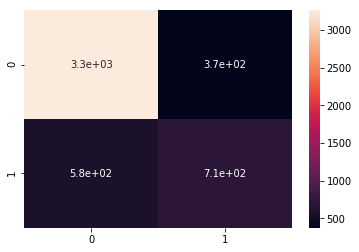

In [349]:
sns.heatmap(cnf, annot=True)

In [350]:
cnf

array([[3262,  373],
       [ 577,  710]])

## VIF:

In [351]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,96.40
12,Inter_Fiber optic,19.83
2,MonthlyCharges,19.07
3,TotalCharges,10.81
11,Inter_DSL,7.56
1,tenure,7.40
7,contract_Two year,2.62
5,PhoneService_ct_Yes,1.87
15,TechSupport_Yes,1.67
6,contract_One year,1.59


In [352]:
x_train_rfe=x_train_rfe.drop(['Inter_Fiber optic'],axis=1)
x_train_rfe.head()

,const,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Mailed check,Inter_DSL,OnlineSecurity_Yes,OnlineBackup_Yes,TechSupport_Yes
879,1.0,0.019693,-0.338074,-0.276449,0,1,0,0,1,0,0,1,0,1,0
5790,1.0,0.305384,-0.464443,-0.112702,0,0,0,0,1,0,0,1,0,1,0
6498,1.0,-1.286319,0.581425,-0.974430,0,1,0,0,1,0,0,0,0,1,0
880,1.0,-0.919003,1.505913,-0.550676,0,1,0,0,1,0,0,0,1,1,1
2784,1.0,-1.163880,1.106854,-0.835971,0,1,0,0,1,0,0,0,0,0,1


In [353]:
model2=sm.GLM(y_train,x_train_rfe,family=sm.families.Binomial())
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.1
Date:                Mon, 29 Jul 2019   Deviance:                       4030.3
Time:                        11:50:53   Pearson chi2:                 6.12e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0436      0.189     -0.231      0.817      -0.414       0.327
tenure                     -1.4751      0.184     -8.023      0.000      -1.835      -1.115
MonthlyCharges              0.8549      0.080     10.715      0.000       0.699       1.011
TotalCharges                0.6430      0.191      3.363      0.001       0.268       1.018
SeniorCitizen               0.4368      0.100      4.386      0.000       0.242       0.632
PhoneService_ct_Yes        -1.0238      0.162     -6.336      0.000      -1.340      -0.707
contract_One year          -0.7578      0.126     -6.011      0.000      -1.005      -0.511
contract_Two year          -1.3614      0.209     -6.503      0.000      -1.772      -0.951
PaperlessBilling_Yes        0.3531      0.090      3.943      0.000       0.178       0.529
Credit card (automatic)    -0.3803      0.113     -3.378      0.001      -0.601      -0.160
Mailed check               -0.3909      0.111     -3.527      0.000      -0.608      -0.174
Inter_DSL                   0.0333      0.111      0.299      0.765      -0.185       0.252
OnlineSecurity_Yes         -0.5080      0.103     -4.926      0.000      -0.710      -0.306
OnlineBackup_Yes           -0.3099      0.094     -3.299      0.001      -0.494      -0.126
TechSupport_Yes            -0.5571      0.104     -5.342      0.000      -0.761      -0.353
===========================================================================================
"""

In [354]:
x_train_rfe=x_train_rfe.drop(['Inter_DSL'],axis=1)
model2=sm.GLM(y_train,x_train_rfe,family=sm.families.Binomial())
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.2
Date:                Mon, 29 Jul 2019   Deviance:                       4030.4
Time:                        11:50:53   Pearson chi2:                 6.11e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0219      0.175     -0.126      0.900      -0.364       0.320
tenure                     -1.4705      0.183     -8.040      0.000      -1.829      -1.112
MonthlyCharges              0.8491      0.077     10.991      0.000       0.698       1.000
TotalCharges                0.6361      0.189      3.357      0.001       0.265       1.007
SeniorCitizen               0.4360      0.100      4.378      0.000       0.241       0.631
PhoneService_ct_Yes        -1.0392      0.153     -6.787      0.000      -1.339      -0.739
contract_One year          -0.7570      0.126     -6.007      0.000      -1.004      -0.510
contract_Two year          -1.3616      0.209     -6.506      0.000      -1.772      -0.951
PaperlessBilling_Yes        0.3533      0.090      3.946      0.000       0.178       0.529
Credit card (automatic)    -0.3802      0.113     -3.377      0.001      -0.601      -0.160
Mailed check               -0.3914      0.111     -3.531      0.000      -0.609      -0.174
OnlineSecurity_Yes         -0.5021      0.101     -4.958      0.000      -0.701      -0.304
OnlineBackup_Yes           -0.3061      0.093     -3.287      0.001      -0.489      -0.124
TechSupport_Yes            -0.5494      0.101     -5.433      0.000      -0.748      -0.351
===========================================================================================
"""

In [355]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,20.68
3,TotalCharges,10.34
1,tenure,7.38
2,MonthlyCharges,4.40
7,contract_Two year,2.47
6,contract_One year,1.55
12,OnlineBackup_Yes,1.45
13,TechSupport_Yes,1.43
10,Mailed check,1.40
11,OnlineSecurity_Yes,1.35


In [356]:
x_train_rfe=x_train_rfe.drop(['TotalCharges'],axis=1)
model2=sm.GLM(y_train,x_train_rfe,family=sm.families.Binomial())
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Churn_Yes   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2021.0
Date:                Mon, 29 Jul 2019   Deviance:                       4042.0
Time:                        11:50:54   Pearson chi2:                 5.32e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0130      0.172     -0.076      0.940      -0.350       0.324
tenure                     -0.9084      0.065    -13.942      0.000      -1.036      -0.781
MonthlyCharges              1.0029      0.063     15.799      0.000       0.879       1.127
SeniorCitizen               0.4459      0.100      4.464      0.000       0.250       0.642
PhoneService_ct_Yes        -0.9823      0.149     -6.587      0.000      -1.275      -0.690
contract_One year          -0.7471      0.125     -5.972      0.000      -0.992      -0.502
contract_Two year          -1.3195      0.207     -6.383      0.000      -1.725      -0.914
PaperlessBilling_Yes        0.3419      0.089      3.827      0.000       0.167       0.517
Credit card (automatic)    -0.3844      0.113     -3.411      0.001      -0.605      -0.164
Mailed check               -0.3406      0.109     -3.111      0.002      -0.555      -0.126
OnlineSecurity_Yes         -0.5012      0.101     -4.957      0.000      -0.699      -0.303
OnlineBackup_Yes           -0.2849      0.093     -3.074      0.002      -0.467      -0.103
TechSupport_Yes            -0.5436      0.101     -5.385      0.000      -0.742      -0.346
===========================================================================================
"""

In [357]:
vif=pd.DataFrame()
vif['Features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif
print(vif['Features'])

0                       const
1                      tenure
6           contract_Two year
2              MonthlyCharges
5           contract_One year
11           OnlineBackup_Yes
12            TechSupport_Yes
9                Mailed check
10         OnlineSecurity_Yes
7        PaperlessBilling_Yes
4         PhoneService_ct_Yes
8     Credit card (automatic)
3               SeniorCitizen
Name: Features, dtype: object


In [358]:
y_train_pred=model2.predict(x_train_rfe)
df_prob=pd.DataFrame({'Churn':y_train , 'Churn_prob':y_train_pred, 'CustID': y_train.index})
df_prob['Predicted']=df_prob['Churn_prob'].apply(lambda x: 1 if x>0.5 else 0)
df_prob.to_csv('LGR_prob.csv')
df_prob.head()


,Churn,Churn_prob,CustID,Predicted
879,0,0.214960,879,0
5790,0,0.331990,5790,0
6498,1,0.692814,6498,1
880,1,0.589529,880,1
2784,1,0.725186,2784,1


In [359]:
cnf=confusion_matrix(df_prob['Churn'],df_prob['Predicted'])
print(cnf)


[[3274  361]
 [ 590  697]]


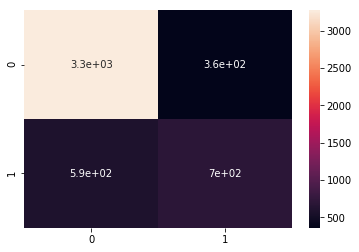

In [360]:
sns.heatmap(cnf,annot=True)

## Model evaluation:

In [361]:
cnf

array([[3274,  361],
       [ 590,  697]])

In [362]:
 #            not churn churn
 # not churn  3274      361
 # churn      590       697
    
TP = cnf[1,1]
FP = cnf[0,1]
TN = cnf[0,0]
FN = cnf[1,0]

In [363]:
pre= cnf[1,1]/(cnf[0,1]+cnf[1,1])
recall= cnf[1,1]/(cnf[1,0]+cnf[1,1])
pre,recall

(0.6587901701323251, 0.5415695415695416)

In [364]:
y_train_pred=model2.predict(x_train_rfe)
df_prob=pd.DataFrame({'Churn':y_train , 'Churn_prob':y_train_pred, 'CustID': y_train.index})

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    df_prob[i]=df_prob['Churn_prob'].apply(lambda x: 1 if x>i else 0)
    
df_prob.head()

,Churn,Churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.214960,879,1,1,1,0,0,0,0,0,0,0
5790,0,0.331990,5790,1,1,1,1,0,0,0,0,0,0
6498,1,0.692814,6498,1,1,1,1,1,1,1,0,0,0
880,1,0.589529,880,1,1,1,1,1,1,0,0,0,0
2784,1,0.725186,2784,1,1,1,1,1,1,1,1,0,0


In [365]:
acc= (TP+TN)/(TP+TN+FP+FN)
sen= (TP)/(TP+FN)
spe= (TN)/(TN+FP)

print("Acc=", acc, "Sen=", sen, "Spe=", spe)

Acc= 0.8067858594067452 Sen= 0.5415695415695416 Spe= 0.900687757909216


In [366]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(df_prob['Churn'],df_prob[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.616213  0.943279  0.500413
0.2   0.2  0.719017  0.856255  0.670426
0.3   0.3  0.770215  0.763015  0.772765
0.4   0.4  0.796424  0.651904  0.847593
0.5   0.5  0.806786  0.541570  0.900688
0.6   0.6  0.800284  0.390831  0.945254
0.7   0.7  0.779358  0.205905  0.982393
0.8   0.8  0.748476  0.045843  0.997249
0.9   0.9  0.738521  0.000000  1.000000


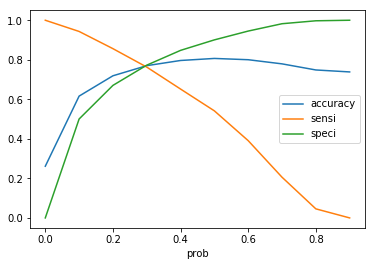

In [367]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])

In [368]:
y_train_pred=model2.predict(x_train_rfe)
df_prob=pd.DataFrame({'Churn':y_train , 'Churn_prob':y_train_pred, 'CustID': y_train.index})
df_prob['Predicted']=df_prob['Churn_prob'].apply(lambda x: 1 if x>0.3 else 0)
df_prob.head()



,Churn,Churn_prob,CustID,Predicted
879,0,0.214960,879,0
5790,0,0.331990,5790,1
6498,1,0.692814,6498,1
880,1,0.589529,880,1
2784,1,0.725186,2784,1


In [369]:
cnf=confusion_matrix(df_prob['Churn'],df_prob['Predicted'])
TP = cnf[1,1]
FP = cnf[0,1]
TN = cnf[0,0]
FN = cnf[1,0]
acc= (TP+TN)/(TP+TN+FP+FN)
sen= (TP)/(TP+FN)
spe= (TN)/(TN+FP)

print("Acc=", acc, "Sen=", sen, "Spe=", spe)

Acc= 0.7702153596099147 Sen= 0.763014763014763 Spe= 0.7727647867950481


In [370]:
cnf


array([[2809,  826],
       [ 305,  982]])

In [371]:
pre= cnf[1,1]/(cnf[0,1]+cnf[1,1])
recall= cnf[1,1]/(cnf[1,0]+cnf[1,1])
pre, recall

(0.543141592920354, 0.763014763014763)

In [372]:
x_test.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,PhoneService_ct_Yes,contract_One year,contract_Two year,PaperlessBilling_Yes,Credit card (automatic),Electronic check,Mailed check,Partner_Yes,Gender_Male,Dependents_Yes,MultiLines_Yes,Inter_DSL,Inter_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,TV_Yes,Movies_Yes
942,24,79.85,2001.00,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3730,57,104.50,5921.35,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,1,0,1,1
1761,58,24.45,1513.60,0,1,0,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2283,1,71.55,71.55,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
1872,41,19.70,804.25,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [373]:
x_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(x_test[['tenure','MonthlyCharges','TotalCharges']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [374]:
vif['Features']

0                       const
1                      tenure
6           contract_Two year
2              MonthlyCharges
5           contract_One year
11           OnlineBackup_Yes
12            TechSupport_Yes
9                Mailed check
10         OnlineSecurity_Yes
7        PaperlessBilling_Yes
4         PhoneService_ct_Yes
8     Credit card (automatic)
3               SeniorCitizen
Name: Features, dtype: object

In [375]:
x_test=x_test[['tenure','contract_Two year','MonthlyCharges','contract_One year','OnlineBackup_Yes','TechSupport_Yes','Mailed check','OnlineSecurity_Yes','PaperlessBilling_Yes','PhoneService_ct_Yes','Credit card (automatic)','SeniorCitizen']]

In [376]:
x_test_sm=sm.add_constant(x_test)
x_test_sm.head()

,const,tenure,contract_Two year,MonthlyCharges,contract_One year,OnlineBackup_Yes,TechSupport_Yes,Mailed check,OnlineSecurity_Yes,PaperlessBilling_Yes,PhoneService_ct_Yes,Credit card (automatic),SeniorCitizen
942,1.0,-0.347623,0,0.499951,0,0,0,0,0,1,1,1,0
3730,1.0,0.999203,0,1.319685,0,1,0,0,0,1,1,1,0
1761,1.0,1.040015,1,-1.342374,0,0,0,0,0,1,1,1,0
2283,1.0,-1.286319,0,0.223935,0,0,0,1,0,1,1,0,0
1872,1.0,0.346196,1,-1.500335,0,0,0,0,0,0,1,0,0


In [377]:
y_test.head()

942     0
3730    1
1761    0
2283    1
1872    0
Name: Churn_Yes, dtype: uint8

In [378]:
y_test_pred=model2.predict(x_test_sm)

In [379]:
y_test_pred.head()

942     0.354121
3730    0.099212
1761    0.157083
2283    0.680378
1872    0.378779
dtype: float64

In [380]:
df_test=pd.DataFrame({'Churn':y_test,'Probability':y_test_pred})
df_test.head()

,Churn,Probability
942,0,0.354121
3730,1,0.099212
1761,0,0.157083
2283,1,0.680378
1872,0,0.378779


In [381]:
df_test['Churn_pred']=df_test['Probability'].apply(lambda x: 1 if x>0.3 else 0)

In [382]:
df_test.head()

,Churn,Probability,Churn_pred
942,0,0.354121,1
3730,1,0.099212,0
1761,0,0.157083,0
2283,1,0.680378,1
1872,0,0.378779,1


In [383]:
cnf_test=metrics.confusion_matrix(df_test['Churn_pred'],df_test['Churn'])

In [384]:
cnf_test

array([[1032,  203],
       [ 496,  379]])

In [385]:
sen=cnf[1,1]/(cnf[0,1]+cnf[1,0])
spe=cnf[0,0]/(cnf[0,0]+cnf[0,1])
fpr=1-spe
sen,spe,fpr

(0.8682581786030061, 0.7727647867950481, 0.22723521320495188)

In [386]:
acc= (cnf[1,1]+cnf[0,0])/(cnf[0,0]+cnf[0,1]+cnf[1,0]+cnf[1,1])
acc

0.7702153596099147